# EXPLORATORY DATA ANALYSIS (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal

df = pd.read_csv("Datasets/Cleaned_Dataset.csv", dtype={"timestamp": str})
df["timestamp"] = pd.to_datetime(df["timestamp"])

## Univariate Analysis
Analysis key columns only as stated in the code below

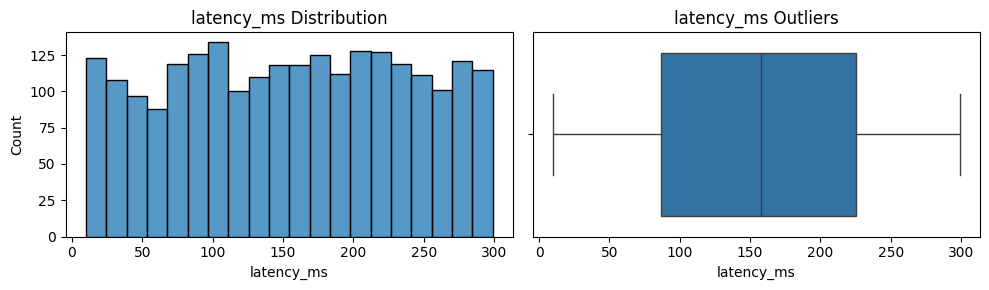

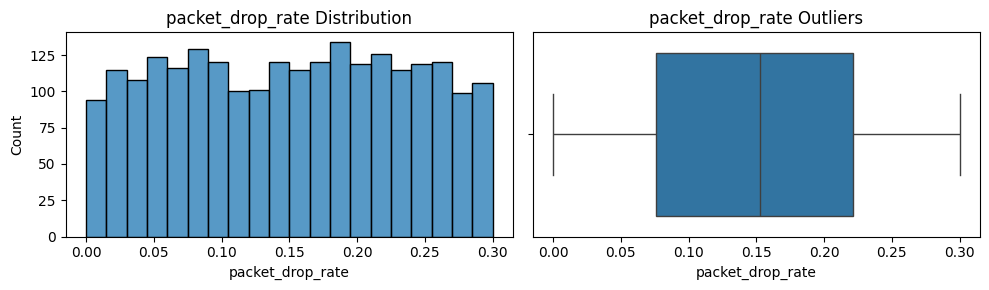

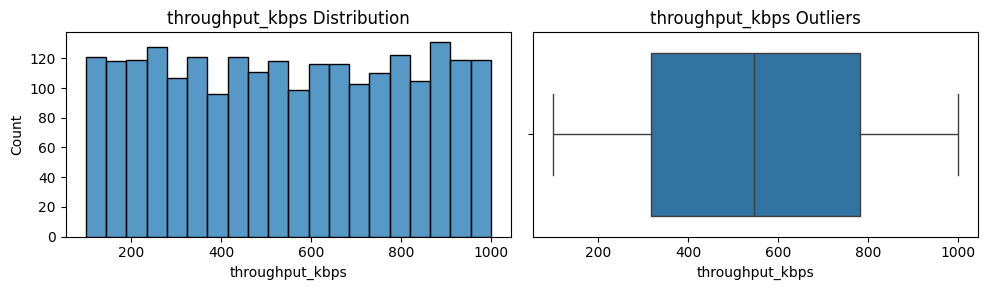

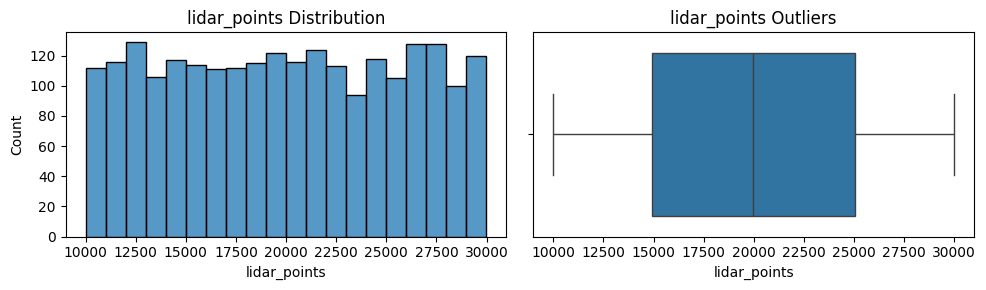

In [2]:
key_cols = [
    "latency_ms",
    "packet_drop_rate",
    "throughput_kbps",
    "lidar_points"
]

for col in key_cols:
    fig, ax = plt.subplots(1, 2, figsize=(10,3))
    sns.histplot(df[col], bins=20, ax=ax[0])
    sns.boxplot(x=df[col], ax=ax[1])
    ax[0].set_title(f"{col} Distribution")
    ax[1].set_title(f"{col} Outliers")
    plt.tight_layout()
    plt.show()



## Bivariate Analysis

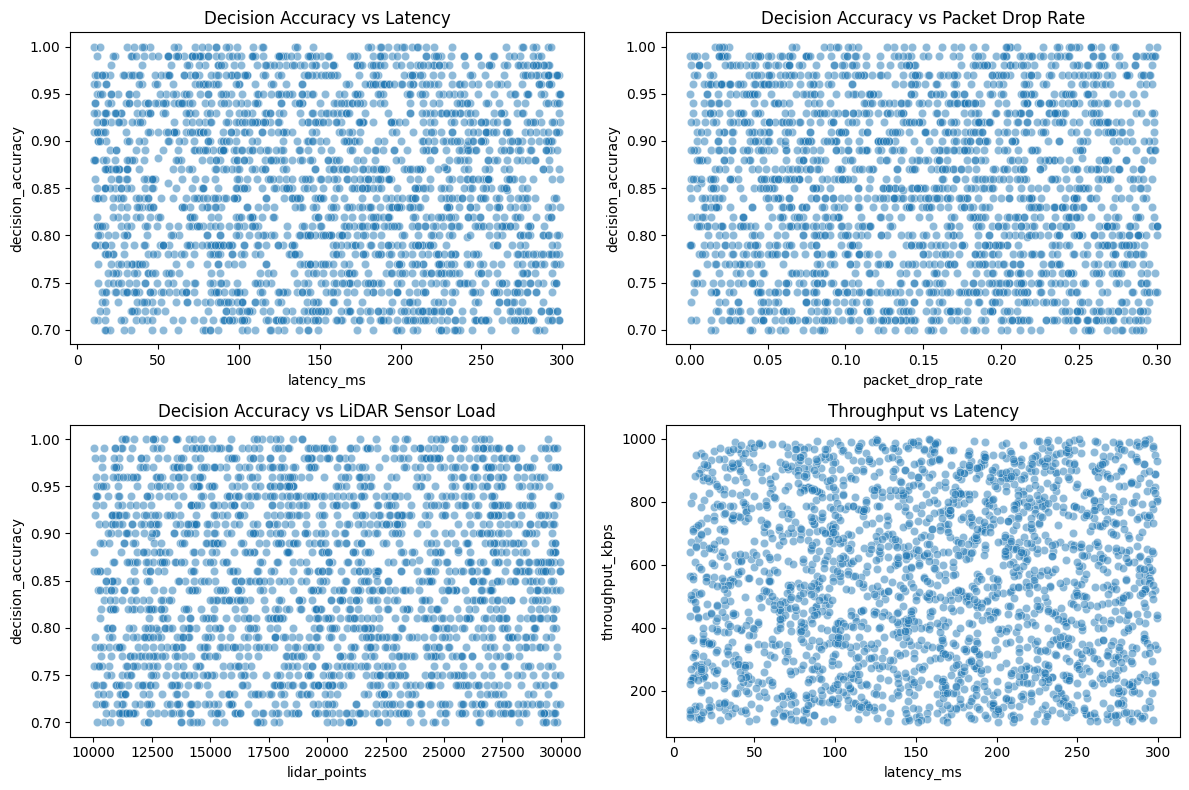

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.scatterplot(
    data=df, x="latency_ms", y="decision_accuracy",
    alpha=0.5, ax=axes[0, 0]
)
axes[0, 0].set_title("Decision Accuracy vs Latency")

sns.scatterplot(
    data=df, x="packet_drop_rate", y="decision_accuracy",
    alpha=0.5, ax=axes[0, 1]
)
axes[0, 1].set_title("Decision Accuracy vs Packet Drop Rate")

sns.scatterplot(
    data=df, x="lidar_points", y="decision_accuracy",
    alpha=0.5, ax=axes[1, 0]
)
axes[1, 0].set_title("Decision Accuracy vs LiDAR Sensor Load")

sns.scatterplot(
    data=df, x="latency_ms", y="throughput_kbps",
    alpha=0.5, ax=axes[1, 1]
)
axes[1, 1].set_title("Throughput vs Latency")

plt.tight_layout()
plt.show()

## Multivariate Analysis

### Correlation Heatmap
Between numeric dataset only

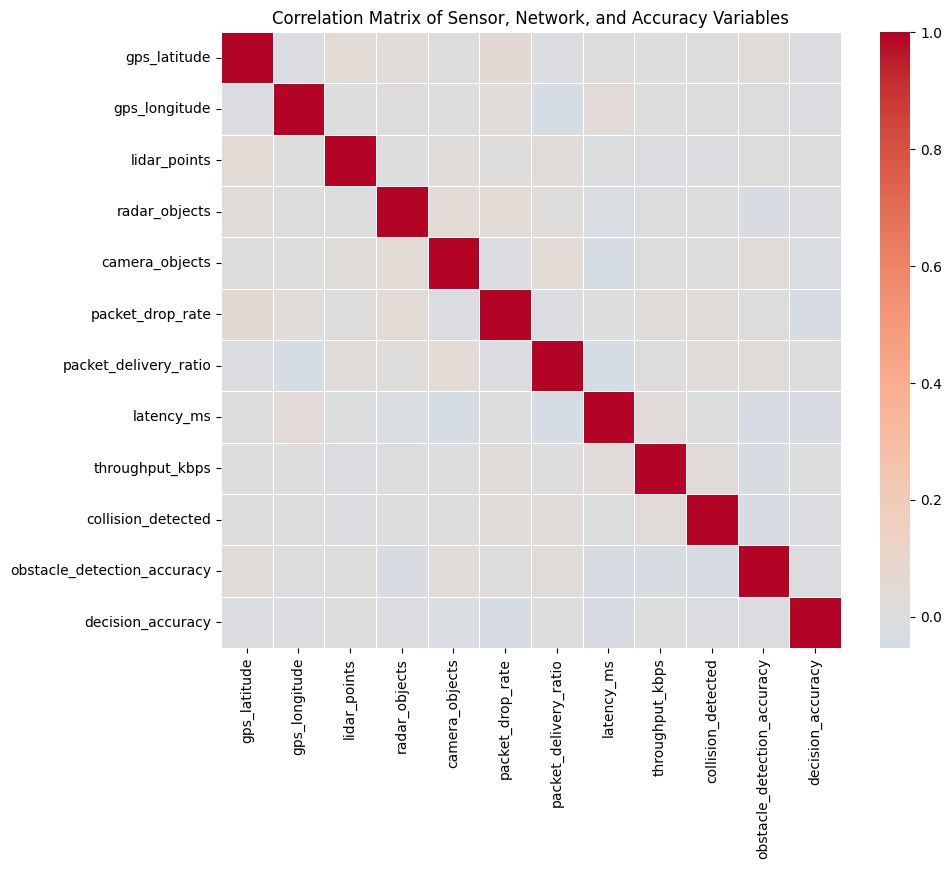

In [4]:
corr_df = df.drop(columns=["timestamp", "vehicle_id"], errors="ignore")
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_df.corr(),
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Matrix of Sensor, Network, and Accuracy Variables")
plt.show()

## Statistical Analysis
Kruskal–Wallis tests

In [5]:
df["latency_group"] = pd.qcut(
    df["latency_ms"],
    q=3,
    labels=["Low Latency", "Medium Latency", "High Latency"]
)
groups_latency = [
    df[df["latency_group"] == g]["decision_accuracy"]
    for g in df["latency_group"].unique()
]
stat, p = kruskal(*groups_latency)
print("Latency vs Decision Accuracy")
print(f"H-statistic = {stat:.4f}, p-value = {p:.6f}")


df["drop_group"] = pd.qcut(
    df["packet_drop_rate"],
    q=3,
    labels=["Low Drop", "Medium Drop", "High Drop"]
)
groups_drop = [
    df[df["drop_group"] == g]["decision_accuracy"]
    for g in df["drop_group"].unique()
]
stat, p = kruskal(*groups_drop)
print("\nPacket Drop Rate vs Decision Accuracy")
print(f"H-statistic = {stat:.4f}, p-value = {p:.6f}")


df["lidar_group"] = pd.qcut(
    df["lidar_points"],
    q=3,
    labels=["Low Sensor Load", "Medium Sensor Load", "High Sensor Load"]
)
groups_lidar = [
    df[df["lidar_group"] == g]["decision_accuracy"]
    for g in df["lidar_group"].unique()
]
stat, p = kruskal(*groups_lidar)
print("\nLiDAR Load vs Decision Accuracy")
print(f"H-statistic = {stat:.4f}, p-value = {p:.6f}")


df["throughput_group"] = pd.qcut(
    df["throughput_kbps"],
    q=3,
    labels=["Low Throughput", "Medium Throughput", "High Throughput"]
)
groups_throughput = [
    df[df["throughput_group"] == g]["decision_accuracy"]
    for g in df["throughput_group"].unique()
]
stat, p = kruskal(*groups_throughput)
print("\nThroughput vs Decision Accuracy") 
print(f"H-statistic = {stat:.4f}, p-value = {p:.6f}")

Latency vs Decision Accuracy
H-statistic = 2.4833, p-value = 0.288902

Packet Drop Rate vs Decision Accuracy
H-statistic = 2.8514, p-value = 0.240340

LiDAR Load vs Decision Accuracy
H-statistic = 1.1962, p-value = 0.549845

Throughput vs Decision Accuracy
H-statistic = 0.3538, p-value = 0.837864
